In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set_palette('Set2')

In [3]:
customer_df = pd.read_csv('data/Mall_Customers.csv')

customer_df = customer_df.drop('CustomerID', axis=1)

# Mall Customer Segmentation

Perform EDA and find the hidden customer spending patterns in the dataset.

# Dataset Overview

In [4]:
print('Shape: ', customer_df.shape)

print('---')
print(customer_df.dtypes)

print('---')
print(customer_df.describe())

print('---')
print(customer_df.isnull().sum())

Shape:  (200, 4)
---
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
---
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000
---
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# EDA

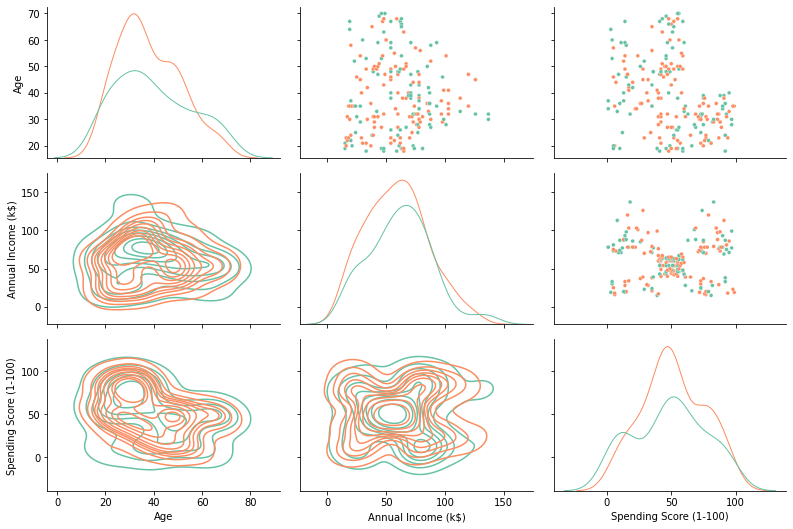

In [6]:
grid = sns.PairGrid(customer_df, hue='Gender', diag_sharey=False, aspect=1.5)

grid.map_upper(sns.scatterplot, s=15)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.kdeplot, lw=1);

Insights:
- **Age**, **Income** and **Spending Score** features are **multimodal distributions** each having two or three heels
- **Annual Income** and **Spending Score** plot seems to be formed with a **five dense regions**: 4 regions are on the sides and one is in the center

## Customer Profile

### Gender

In [7]:
fig = px.pie(
    data_frame=customer_df, 
    names='Gender', 
    title='Customer Genders', 
    hole=0.1, 
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

Insights:
- **female customers** are on 6% more then males. Virtually even distribution

In [21]:
customer_df[['Age', 'Annual Income (k$)']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0


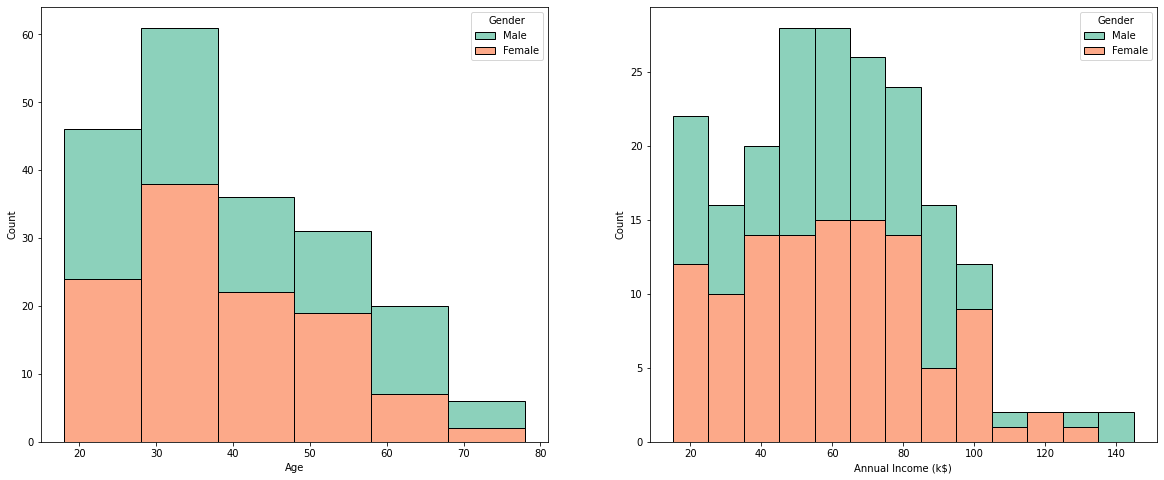

In [8]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=customer_df, x='Age', hue='Gender', binwidth=10, multiple='stack', ax=ax0)
sns.histplot(data=customer_df, x='Annual Income (k$)', hue='Gender', binwidth=10, multiple='stack', ax=ax1);

Insights:
- **20-30, 30-40** are **the most common ages groups** among customers
- **The biggest cusomer age group** is **30 year-old** customers (mostly women)
- **Most of customers** earn between **\$50k and \$80k** annually
- **Big part of customers** earn only **$20k** annually

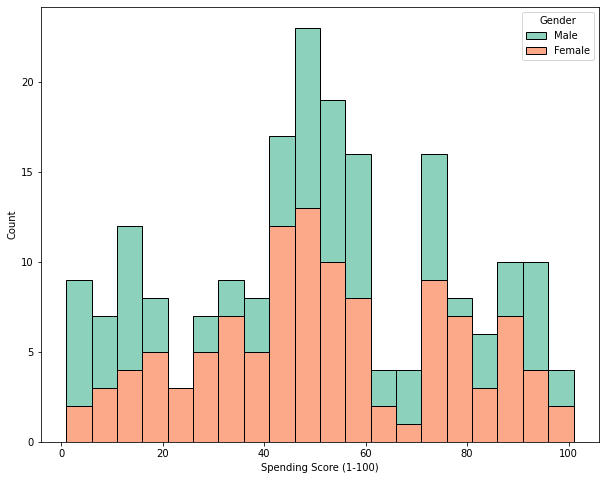

In [10]:
plt.figure(figsize=(10, 8))

sns.histplot(data=customer_df, x='Spending Score (1-100)', hue='Gender', binwidth=5, multiple='stack');

Insights:
- Spending scores have a few modes: 
    - between 0 and 20 (men domintate)
    - between 25 and 40 (women domintate)
    - between 45 and 60 (women domintate)
    - between 65 and 70 (men dominates)
    - between 70 and 100 (women dominates) 

## Spending Score

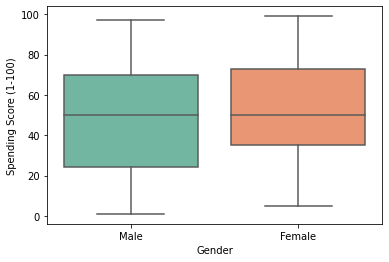

In [11]:
sns.boxplot(data=customer_df, x='Gender', y='Spending Score (1-100)');

Insights:
- **Women** tend to **spend more** as we see from the bottom bar bound
- **On average**, **women** just **spend slightly more** then men

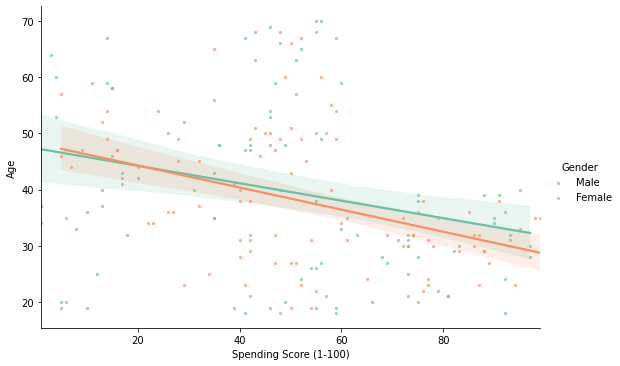

In [12]:
sns.lmplot(
    data=customer_df,
    x='Spending Score (1-100)', 
    y='Age', 
    hue='Gender',
    aspect=1.5,
    scatter_kws={'s': 5, 'alpha': 0.6}
);

Insights:
- There is a linear dependency between **Spending Score** and **Age**. Younger customers tend to have higher spending score and spending score decreases when age goes up.

Introducting **Spending Groups** can help to reveal more insights. So let's introduce three spending groups:

In [13]:
def impute_spending_group(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 65:
        return 'medium'
    if spending_score > 65:
        return 'high'

customer_df['SpendingGroup'] = customer_df['Spending Score (1-100)'].apply(impute_spending_group)

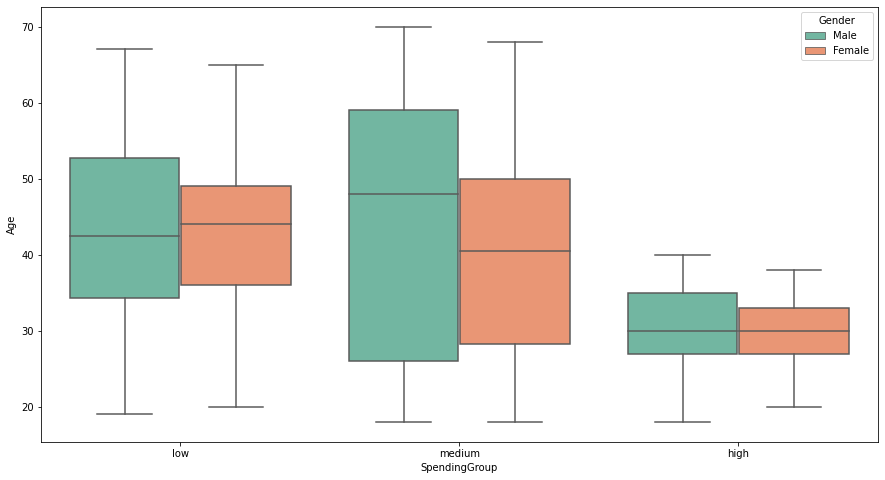

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Age', hue='Gender', order=['low', 'medium', 'high']);

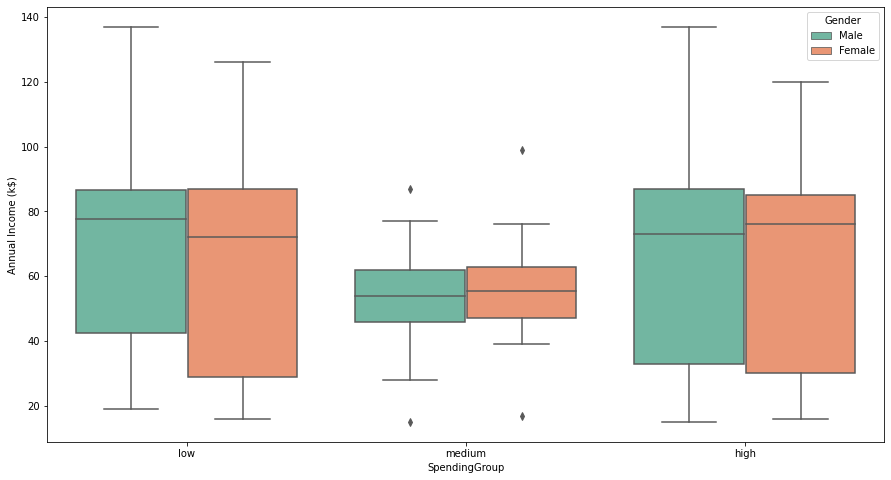

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Annual Income (k$)', hue='Gender', order=['low', 'medium', 'high']);

In [22]:
customer_df[customer_df['SpendingGroup'] == 'medium']['Annual Income (k$)'].describe()

count    87.000000
mean     54.448276
std      12.588070
min      15.000000
25%      46.500000
50%      54.000000
75%      62.000000
max      99.000000
Name: Annual Income (k$), dtype: float64

Insights:
- From the Spending Group - Age plot we can see that the lowest variation is in **high spending group**. Its members are in **20-40 age group**. Low and medium spending groups seem to roughly covers the whole age range.
- From the Spending Group - Annual Income plot we can see that customers from **the center of the annual income distribution** ($40k-$60k) belongs to **medium spending group** 

# Clustering

TBU

# Cluster Analysis

TBU

# Summary

## References
- https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis
- https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms